In [5]:
!pip install pandas matplotlib seaborn scikit-learn koreanize-matplotlib 


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
!pip install notebook==6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 11.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: notebook
    Found existing installation: notebook 7.2.1
    Uninstalling notebook-7.2.1:
      Successfully uninstalled notebook-7.2.1

[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [1]:
#import 모음
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# 분석
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


2025-05-19 11:47:24.758638: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-19 11:47:25.123419: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747622845.291044    2129 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747622845.332664    2129 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747622845.646616    2129 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
#0515
data=pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/iris3.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#결측값 체크
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

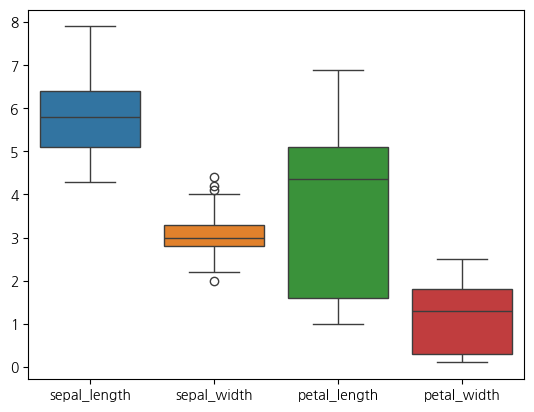

In [4]:
# 이상치
sns.boxplot(data)

In [6]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
X= data.drop("species", axis=1)
y= data['species']

In [8]:
y=pd.get_dummies(y)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [9]:
# label 인코딩

#from sklearn.preprocessing import LableEncoder
le= LabelEncoder()
y= le.fit_transform(y)


NameError: name 'LabelEncoder' is not defined

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=10 )

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()
train_temp = mms.fit_transform(X_train)
test_temp = mms.transform(X_test)
mms_X_train = pd.DataFrame(train_temp, columns=X_train.columns, index= X_train.index)
mms_X_test = pd.DataFrame(test_temp, columns=X_test.columns, index= X_test.index)
display(mms_X_train)
display(mms_X_test)

#다음단계가 분석

In [ ]:
# 클래스의 수 체크
y_test

# 0,1,2 세가지

# 텐서플로로 다중분류 분석하기
이진분류가 아닌점 주의

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.utils import to_categorical #gpt


In [ ]:
##GPT

# 원-핫 인코딩
y_train_cat = 
y_test_cat = 

In [ ]:
# 신경망 모델 정의
model = Sequential()                  # shape[1]을 통해 변수의 컬럼수
model.add(Input(shape=(mms_X_train.shape[1],)))
model.add(Dense(16, activation='relu')) # 이줄까지 입력층
# 다음레이어
model.add(Dense(8, activation='relu')) # 여기부터 은닉층
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax')) # 출력층
# 이진분류- sigmoid, 다중분류- softmax

- 다중 분류의 경우 사용하는 loss
    - categorical_crossentropy
    <br> 종속변수 클래스가 3개 이상일때
    <br> one-hot인코딩된 경우
    - sparse_categorical_crossentropy
    <br> 종속변수 클래스가 3개 이상이면서
    <br> 레이블 인코딩된 경우

In [ ]:
## 다중분류가 되면 loss 주는법이 달라짐

In [ ]:
# 모델의 파라미터 세팅                                      #metrics의 시그니처는 다양함
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

# 만들어진 모델을 출력 - 시퀀셜모델이 이렇게 정의가 되었다~
model.summary()

In [ ]:
y_train[:5]

In [ ]:
len(mms_X_train)

In [ ]:
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=16,
                   validation_data=(mms_X_test, y_test))

pred = model.predict(mms_X_test)
pred = pd.DataFrame(pred, index=y_test.index)
result = pd.concat([y_test,pred], axis=1)
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train','val'])
plt.show()
result

In [ ]:
score = model.evaluate(mms_X_test, y_test)
print('test loss :', score[0])
print('test accuracy :', score[0])

# 결과에서 마지막Epoch의 accur과 loss를 보여줌

Functional API

In [ ]:
from keras.models import Model

In [ ]:
inputs = Input(shape=(mms_X_train.shape[1],))
x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
x = Dense(4, activation='relu')(x)

outputs = Dense(3, activation='softmax')(x)
model = Model(inputs, outputs) # 이렇게도 가능함
model.summary()


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer= 'adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=16,
                   validation_data=(mms_X_test, y_test))

pred = model.predict(mms_X_test)
pred = pd.DataFrame(pred, index=y_test.index)
result = pd.concat([y_test,pred], axis=1)
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train','val'])
plt.show()
result

Subclass API

In [ ]:
class Iris(Model):
    def __init__(self):
        super(Iris, self).__init__()
        self.dense1 =Dense(16, activation='relu')
        self.dense2 =Dense(8, activation='relu')
        self.dense3 =Dense(4, activation='relu')
        self.classifier = Dense(3,activation='softmax')

        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.classifier(x)
        
        
        

In [ ]:
model = Iris()


# 아래부분은 동일함
model.compile(loss="categorical_crossentropy", optimizer= 'adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=16,
                   validation_data=(mms_X_test, y_test))

pred = model.predict(mms_X_test)
pred = pd.DataFrame(pred, index=y_test.index)
result = pd.concat([y_test,pred], axis=1)
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train','val'])
plt.show()
result